In [1]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
importlib.reload(ps)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'


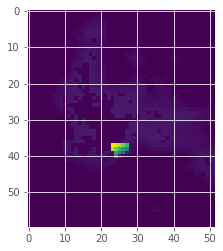

In [2]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
data = pd.read_csv("th100_atol_15_dirdelta_1.csv")
variogram_set = np.array(data.iloc[:,3:])


#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)
#EAM[37][23]+=1

nonsat = ps.desaturate(luminance,th=62)


variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
coords = np.array(data.iloc[:,1:3])


NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
sensitivity = ps.f5(NLTI,EAM,15)


aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,coords)


aptitude.selectFitnessFunction("max")
f = aptitude.f

X = np.array([37,23])
f(X)

plt.imshow(sensitivity)

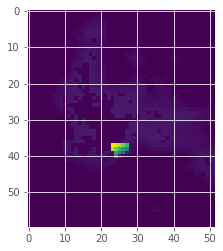

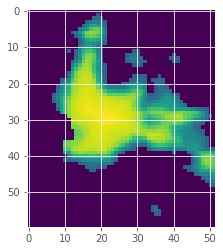

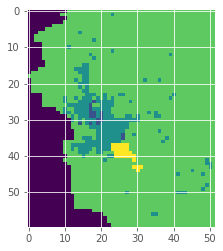

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(sensitivity)
fig.savefig('sensitivity.eps', format='eps', dpi=100)

fig, ax = plt.subplots()
ax.imshow(nonsat)
fig.savefig('NTLI.eps', format='eps', dpi=100)

fig, ax = plt.subplots()
ax.imshow(EAM)
fig.savefig('EAM.eps', format='eps', dpi=100)

In [4]:
plt.savefig('destination_path.eps', format='eps')

<Figure size 432x288 with 0 Axes>

Search Space Boundaries: [[ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]]
 The best solution found:                                                                           
 [37. 26. 31. 37. 27. 25. 39. 25. 21. 16. 38. 23. 38. 24. 37. 25. 36. 44.
 36. 25.]

 Objective function:
 -28592012.00689003


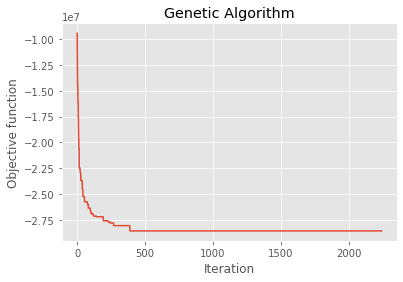

In [27]:
n_sensors = 10

#variable ranges, 2 ranges per sensor position (dim*n_sensors) 
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
print("Search Space Boundaries:", varbound)

dim = len(varbound)

#algorithms_parameters={'max_num_iteration': None, 'population_size': 500, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}

model=ga(function=f,
         dimension=dim,
         algorithm_parameters={'max_num_iteration': None, 'population_size': 1000, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None},
         variable_type='int',
         variable_boundaries=varbound)

model.run()

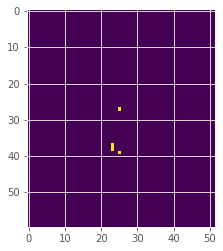

In [24]:
X = model.output_dict["variable"]
P = aptitude.showPositions(X)>0
plt.imshow(P)
plt.show()

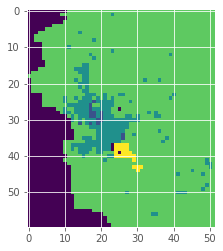

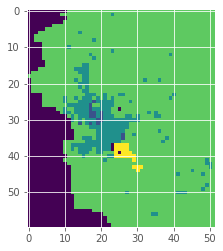

In [25]:
EAM = ps.readIMG(niveles,invert=True)
plt.imshow( (1-P)*EAM )



fig, ax = plt.subplots()
ax.imshow( (1-P)*EAM)
fig.savefig('result_over_EAM.eps', format='eps', dpi=100)


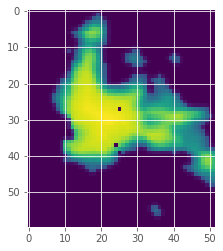

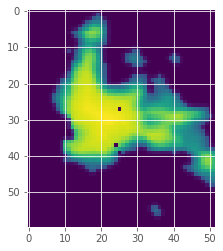

In [22]:
NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
plt.imshow( (1-P)*NLTI )


fig, ax = plt.subplots()
ax.imshow((1-P)*NLTI)
fig.savefig('result_over_NLTI.eps', format='eps', dpi=100)

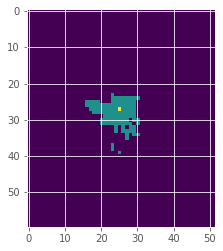

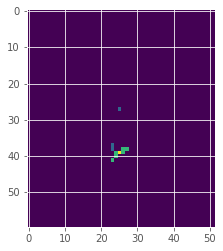

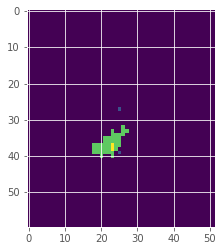

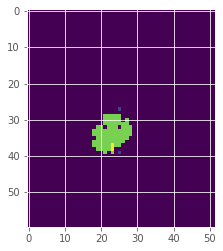

In [26]:
cover = np.zeros(NLTI.shape)
for i in range(n_sensors):
    cover = ((aptitude.coverage(X)[i]>0))*(i+1)
    
    fig, ax = plt.subplots()
    ax.imshow(cover+P)
    fig.savefig('roi_'+str(i)+'.eps', format='eps', dpi=100)


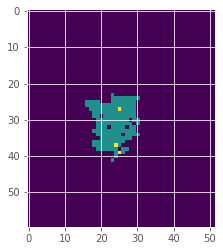

In [18]:
plt.imshow(1*(cover>0)+P)

In [113]:
EAM[X[0]][X[1]]=0
EAM[X[2]][X[3]]=0


array([[0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.],
       ...,
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.]], dtype=float32)

In [90]:
y = int(X[0])
x = int(X[1])
EAM[y][x] = 0

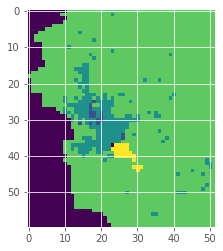

In [102]:



fig, ax = plt.subplots()
ax.imshow(EAM)
fig.savefig('res01_example.eps', format='eps', dpi=100)

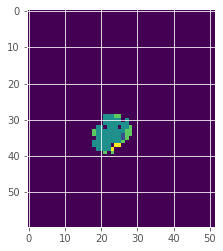

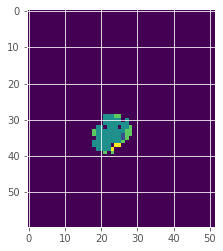

In [103]:
cover = (NLTI*(aptitude.coverage(X)[0]>0))

cover[y][x]=80
plt.imshow((cover>0)*EAM)


fig, ax = plt.subplots()
ax.imshow((cover>0)*EAM)
fig.savefig('res01_example_b.eps', format='eps', dpi=100)

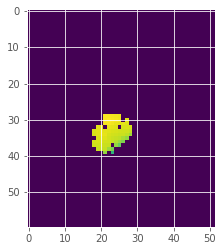

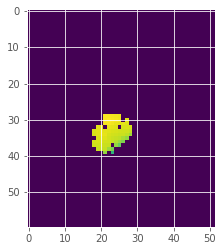

In [104]:
NLTI[y][x]=0
plt.imshow((cover>0)*NLTI)




fig, ax = plt.subplots()
ax.imshow((cover>0)*NLTI)
fig.savefig('res01_example_c.eps', format='eps', dpi=100)